# Craft a Story from Gun Violence, USA

# Introduction

## Background

The history of mass shootings in the United States spans several decades, and unfortunately, it has become an all-too-familiar pattern of violence that has impacted countless individuals and communities. From 1982 to 2023, the United States has seen an alarming number of mass shootings that have resulted in numerous fatalities and injuries.

Although there have been significant efforts to prevent future mass shootings, unfortunately, the United States has continued to experience tragic incidents of violence. Particullary school shootings have become an increasingly concerning issue over the past few decades, leading parents, such as myself, to worry about the safety of our children while they are at school.
These tragic events have had a devastating impact on students, teachers, and communities, and have led to a national conversation about gun control, mental health, and school safety.

The goal of this project is to identify which cities in the United States are more susceptible to experiencing tragic mass shootings, particularly in school settings. The decision to specifically investigate school shootings was driven by my personal concern for the safety of my children who attend elementary and middle schools. As a parent, I constantly ask myself whether it is safe to send my children to school, and I hope that this project can shed some light on this important issue.


# Dataset

The dataset for this project is extracted from Kaggle: https://www.kaggle.com/datasets/nidzsharma/us-mass-shootings-19822023
    

## Key Questions to answer

The goal of this project is to focus on the overall question - 
"which state in the United States are more susceptible to experiencing tragic mass shootings, particularly in school settings." The following sub-question will help us investigate the data further:

    Which state has the most school shootings?
    Which state has the highest number of victims?
    Out of the total number of victims how man of them were fatal?    
    what is the trend?


# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import scipy.stats as stats
import folium


In [2]:
ShootingDf = pd.read_csv('shooting-1982-2023.csv')
sns.set(style='ticks')

# Data Wrangling

In [3]:
ShootingDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              141 non-null    object
 1   location                          141 non-null    object
 2   date                              141 non-null    object
 3   summary                           141 non-null    object
 4   fatalities                        141 non-null    int64 
 5   injured                           141 non-null    object
 6   total_victims                     141 non-null    object
 7   location.1                        141 non-null    object
 8   age_of_shooter                    141 non-null    object
 9   prior_signs_mental_health_issues  141 non-null    object
 10  mental_health_details             141 non-null    object
 11  weapons_obtained_legally          141 non-null    object
 12  where_obtained        

In [4]:
#check the dataframe content
ShootingDf.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022


In [5]:
#check if the dataframe cotains null value
ShootingDf.isna().sum()

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      1
race                                0
gender                              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64

In [6]:
#check the column location
ShootingDf['location.1'].value_counts()

Other          50
Workplace      45
School         22
Religious       7
Military        6
workplace       5
Other\n         3
religious       1
Airport         1
\nWorkplace     1
Name: location.1, dtype: int64

In [7]:
#cleaing the dataset for locaiton
ShootingDf.replace({'Other\n':'Other',
              '\nWorkplace': 'Workplace',
              'workplace': 'Workplace',
              'religious':'Religious'
    },inplace=True)

In [8]:
ShootingDf['location.1'].value_counts()

Other        53
Workplace    51
School       22
Religious     8
Military      6
Airport       1
Name: location.1, dtype: int64

In [9]:
ShootingDf[['latitude','longitude']]

,latitude,longitude
0,-,-
1,-,-
2,-,-
3,-,-
4,-,-
...,...,...
136,28.0331886,-80.6429695
137,35.6672015,-97.42937037
138,32.5520013,-117.0430813
139,32.925166,-96.838676


In [10]:
ShootingDf['latitude'].replace('-', np.nan)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
136    28.0331886
137    35.6672015
138    32.5520013
139     32.925166
140     25.796491
Name: latitude, Length: 141, dtype: object

In [11]:
ShootingDf['longitude'].replace('-', np.nan, inplace=True)

In [12]:
ShootingDf[['latitude','longitude']]

,latitude,longitude
0,-,NaN
1,-,NaN
2,-,NaN
3,-,NaN
4,-,NaN
...,...,...
136,28.0331886,-80.6429695
137,35.6672015,-97.42937037
138,32.5520013,-117.0430813
139,32.925166,-96.838676


# Feature engineering

In [13]:
ShootingDf['location'].nunique()

130

In [14]:
#extract city and state from location column by splitting the column
ShootingDf[['City','State']] = ShootingDf['location'].str.split(',',expand = True)

In [15]:
ShootingDf['State'] = ShootingDf['State'].str.strip()


In [16]:
ShootingDf['State'].unique()

array(['TN', 'Michigan', 'California', 'Virginia', 'Colorado',
       'North Carolina', 'Indiana', 'Illinois', 'Alabama', 'Maryland',
       'Oklahoma', 'Texas', 'New York', 'Georgia', 'Missouri',
       'Wisconsin', 'New Jersey', 'Florida', 'Ohio', 'Pennsylvania',
       'Tennessee', 'Nevada', 'Washington', 'Lousiana', 'Kansas',
       'Oregon', 'South Carolina', 'D.C.', 'Connecticut', 'Minnesota',
       'Arizona', 'Kentucky', 'Nebraska', 'Utah', 'Mississippi',
       'Massachusetts', 'Hawaii', 'Arkansas', 'Iowa'], dtype=object)

In [17]:
#clean the column state
ShootingDf['State'].replace('TN', 'Tennessee',inplace=True)

In [18]:
ShootingDf['State'].unique()

array(['Tennessee', 'Michigan', 'California', 'Virginia', 'Colorado',
       'North Carolina', 'Indiana', 'Illinois', 'Alabama', 'Maryland',
       'Oklahoma', 'Texas', 'New York', 'Georgia', 'Missouri',
       'Wisconsin', 'New Jersey', 'Florida', 'Ohio', 'Pennsylvania',
       'Nevada', 'Washington', 'Lousiana', 'Kansas', 'Oregon',
       'South Carolina', 'D.C.', 'Connecticut', 'Minnesota', 'Arizona',
       'Kentucky', 'Nebraska', 'Utah', 'Mississippi', 'Massachusetts',
       'Hawaii', 'Arkansas', 'Iowa'], dtype=object)

In [19]:
#clean the column total_victims
ShootingDf['total_victims'].unique()

array(['6', '8', '21', '12', '30', '5', '7', '53', '3', '4', 'TK', '38',
       '13', '11', '9', '15', '10', '32', '36', '48', '16', '34', '17',
       '23', '46', '604', '102', '35', '18', '19', '20', '29', '82', '44',
       '26', '55', '22', '37', '28', '25', '14', '41'], dtype=object)

In [20]:
ShootingDf['total_victims'].replace('TK', np.NaN, inplace=True)

In [21]:
ShootingDf['total_victims'] = pd.to_numeric(ShootingDf['total_victims'], errors='coerce')

# fill NaN values with 0
ShootingDf['total_victims'].fillna(0, inplace=True)

# convert column to integer dtype
ShootingDf['total_victims'] = ShootingDf['total_victims'].astype(int)

In [22]:
ShootingDf['total_victims'].unique()

array([  6,   8,  21,  12,  30,   5,   7,  53,   3,   4,   0,  38,  13,
        11,   9,  15,  10,  32,  36,  48,  16,  34,  17,  23,  46, 604,
       102,  35,  18,  19,  20,  29,  82,  44,  26,  55,  22,  37,  28,
        25,  14,  41])

# Exploratory Data Analysis

## Plot mass shooting per location

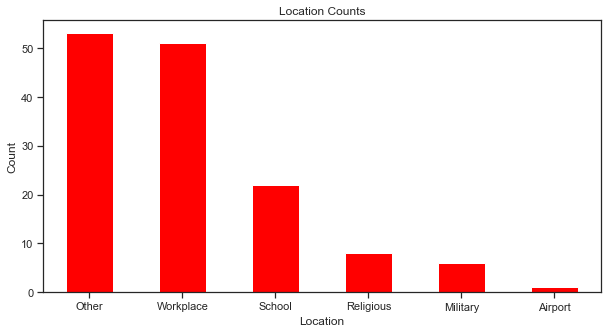

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ShootingDf['location.1'].value_counts().plot.bar(rot=0, color='red', ax=ax)

ax.set_xlabel('Location')
ax.set_ylabel('Count')
ax.set_title('Location Counts')
plt.show()

The plot above shows that in general, workplace settings tend to experience more mass shootings compared to schools. Nonetheless, the critical question is how do the fatality rates of mass shootings in workplaces compare to those in school environments?

To understand the comparison, we will plot fatality rate by location

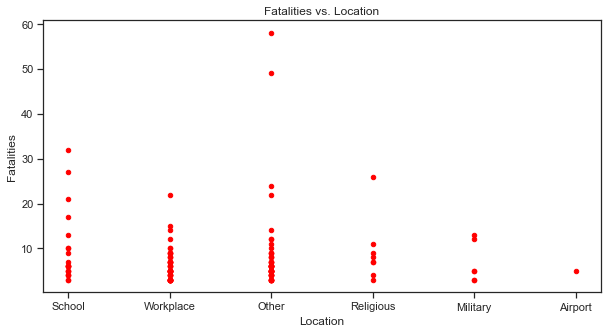

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ShootingDf.plot.scatter(x='location.1', y='fatalities', color='red', ax=ax)

ax.set_xlabel('Location')
ax.set_ylabel('Fatalities')
ax.set_title('Fatalities vs. Location')
plt.show()



Per the plot above, while it is true that mass shootings in the workplace may occur more frequently than in schools, the fatality rate and number of victims of school shootings tends to be higher.  This may be due to the concentrated number of school children in a confined area, often with limited means of escape.

## Top states with the highest number of shootings 

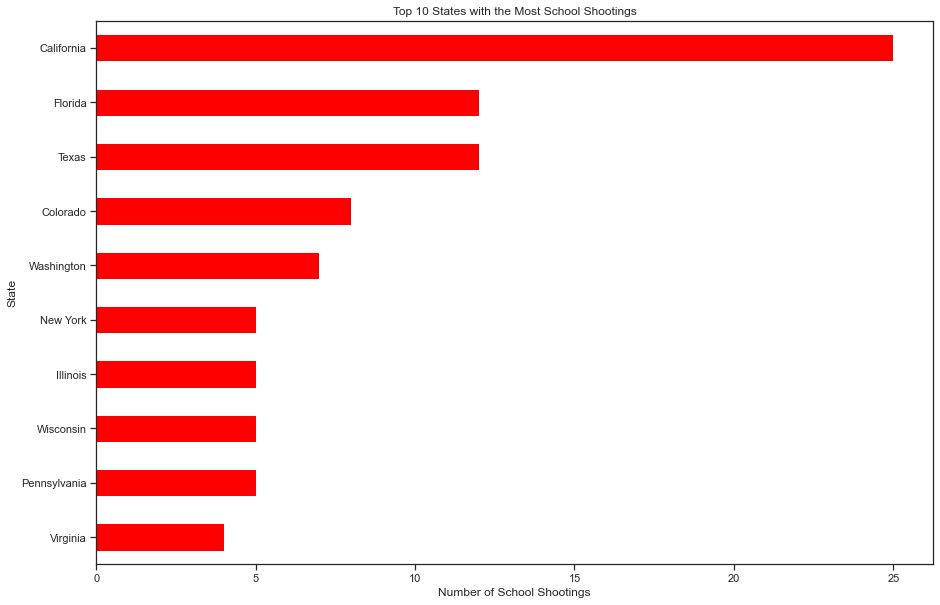

In [25]:
plt.figure(figsize=(15, 10))
ax = ShootingDf['State'].value_counts()[:10].sort_values().plot(kind='barh', color='red')
ax.set_xlabel('Number of School Shootings')
ax.set_ylabel('State')
ax.set_title('Top 10 States with the Most School Shootings')
plt.show()



California ranks the highest in number of shootings overall.

But, do  most school shootings also happen in Califonia ?

## Top states with the highest number of school shootings

Were there more than one shooting in any state in a school setting?

In [26]:
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']
school_shootings['State'].value_counts()


California      4
Michigan        2
Virginia        2
Texas           2
Oregon          2
Tennessee       1
Florida         1
Washington      1
Connecticut     1
Illinois        1
Pennsylvania    1
Minnesota       1
Colorado        1
Arkansas        1
Iowa            1
Name: State, dtype: int64

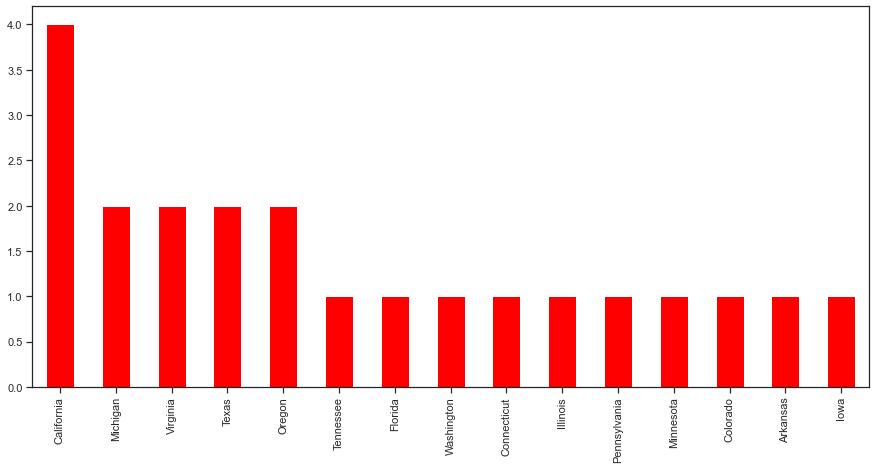

In [27]:
plt.figure(figsize=(15, 7))
ax = ShootingDf[ShootingDf['location.1'] == 'School']['State'].value_counts().plot(kind='bar', color='red')



Yes, California has the most school shootings (i.e 4), followed by Michigan, Virginia, Texas and Oregon with 2 incidents each.

## States with highest number of total victims

We will investigate if California, with the highest number of school shooting rates, also has the most victims. 

In [28]:
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']
school_shootings_total_victim = school_shootings.groupby('State')['total_victims'].sum()
school_shootings_total_victim = school_shootings_total_victim.sort_values(ascending=False)
print(school_shootings_total_victim)

State
California      78
Texas           61
Virginia        60
Oregon          47
Colorado        37
Florida         34
Connecticut     29
Illinois        26
Michigan        19
Arkansas        15
Minnesota       15
Pennsylvania    11
Iowa             7
Tennessee        6
Washington       6
Name: total_victims, dtype: int32


California had a total of 78 victims from school shootings, which is the highest number. 

Even though Texas, Virginia, Oregon and Michigan have same number of shooting rate, i.e. 2, Texas, with the same number of rate has the highest number of victims. At the same time Colorado had less school shooting incident (i.e. 1), but it had higher number of victims than states like Michigan that had 2 school shootings. 

The number of incidents of school shootings in a state does not necessarily indicate the severity of the incidents. The total number of victims is an important factor to consider as well. Texas and Colorado had more victims in their shootings, even though they had fewer incidents overall. This underscores the importance of looking at multiple factors when evaluating the impact of school shootings in different states.


On the other hand, the number of school shootings alone does not fully capture the severity of the incidents, as the number of victims can vary greatly even within states with the same number of incidents. Therefore, it is crucial to consider both the number of shootings and the number of victims to have a more comprehensive understanding of the impact of school shootings in different states

## School Shooting Trend over Time

Investigate the trend of school schootings over time. Is it increasng or decreasing?

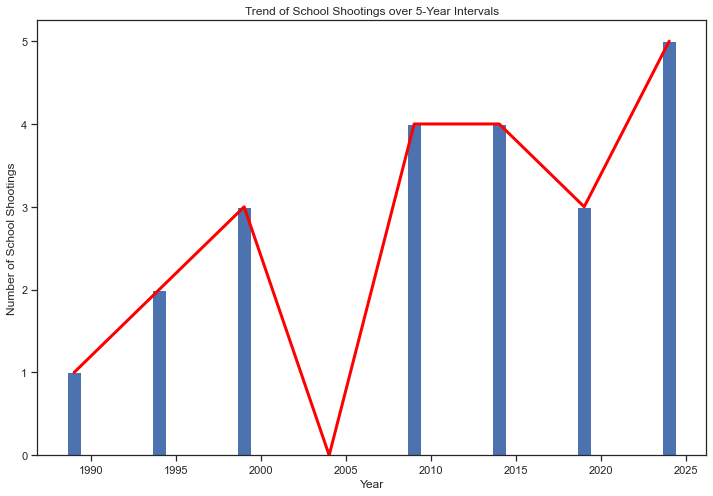

In [29]:
# convert year column to datetime objects
ShootingDf['year'] = pd.to_datetime(ShootingDf['year'], format='%Y')

# group by 5-year intervals and count occurrences
shootings_per_interval = ShootingDf[ShootingDf['location.1'] == 'School'].groupby(pd.Grouper(key='year', freq='5Y')).size()

# plot the trend
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(shootings_per_interval.index.year, shootings_per_interval.values)

# add a line plot on top
ax.plot(shootings_per_interval.index.year, shootings_per_interval.values, color='red', linewidth=3)

# set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of School Shootings')
ax.set_title('Trend of School Shootings over 5-Year Intervals')

# display the plot
plt.show()


The trend shown in the above plot tells us that there has been an overall increase in school shootings over time. 

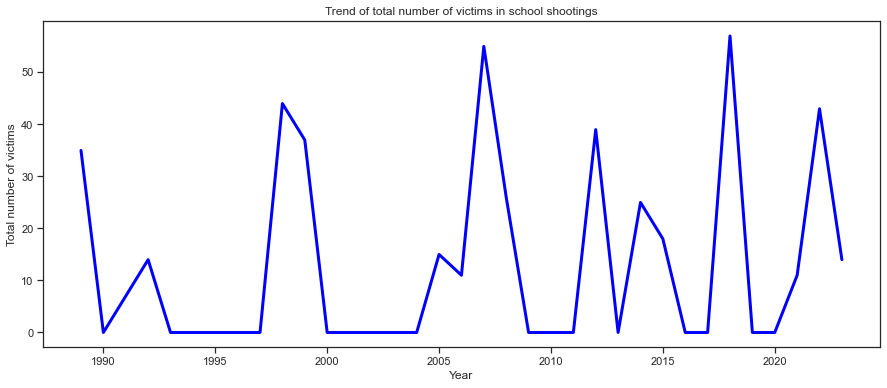

In [30]:
# Convert year column to datetime objects
ShootingDf['year'] = pd.to_datetime(ShootingDf['year'], format='%Y')

# Group by year and sum the number of total victims
total_victims_per_year = ShootingDf[ShootingDf['location.1'] == 'School'].groupby(pd.Grouper(key='year', freq='1Y'))['total_victims'].sum()

# Plot the trend
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(total_victims_per_year.index.year, total_victims_per_year.values, color='blue', linewidth=3)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total number of victims')
ax.set_title('Trend of total number of victims in school shootings')

# Display the plot
plt.show()

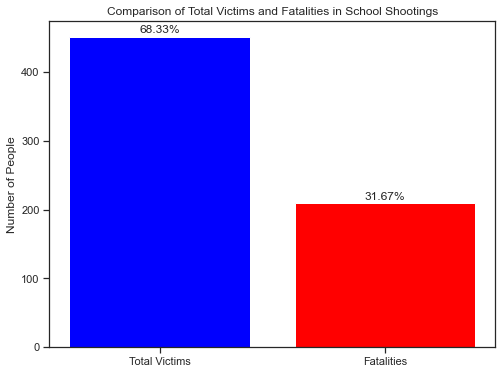

In [35]:
# filter for school shootings only
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']

# calculate total number of victims and number of fatalities
total_victims = school_shootings['total_victims'].sum()
total_fatalities = school_shootings['fatalities'].sum()

# create a stacked bar chart
plt.figure(figsize=(8,6))
plt.bar(['Total Victims', 'Fatalities'], [total_victims, total_fatalities], color=['blue', 'red'])

# add text labels with percentage values
plt.text(0, total_victims + 5, str(victims_percent) + '%', ha='center', fontsize=12)
plt.text(1, total_fatalities + 5, str(fatalities_percent) + '%', ha='center', fontsize=12)

plt.ylabel('Number of People')
plt.title('Comparison of Total Victims and Fatalities in School Shootings')

plt.show()

## Age of school Shooters

In [36]:
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']
school_shootings['age_of_shooter'].value_counts()

15    3
28    2
43    2
22    2
17    2
26    2
20    2
18    1
19    1
27    1
23    1
32    1
16    1
11    1
Name: age_of_shooter, dtype: int64

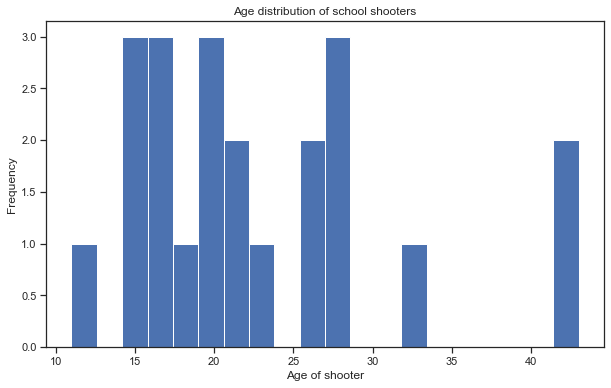

In [37]:
import matplotlib.pyplot as plt

school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']
age_of_shooter = school_shootings['age_of_shooter'].dropna().astype(int)

plt.figure(figsize=(10, 6))
plt.hist(age_of_shooter, bins=20)
plt.xlabel('Age of shooter')
plt.ylabel('Frequency')
plt.title('Age distribution of school shooters')
plt.show()


From the plot above, it is evident that younger individuals are more likely to carry out school shootings attacks.

The question is why younger individuls tend to attack schools?


One factor is the presence of mental health issues, which may be more common among younger individuals. Conditions such as depression, anxiety, and personality disorders may contribute to feelings of hopelessness or desperation that could lead to violent behavior.

## Mental health status of the shooter

In [38]:
ShootingDf['mental_health_issues'] = ShootingDf['prior_signs_mental_health_issues'].apply(lambda x: 1 if x == 'Yes' else 0)


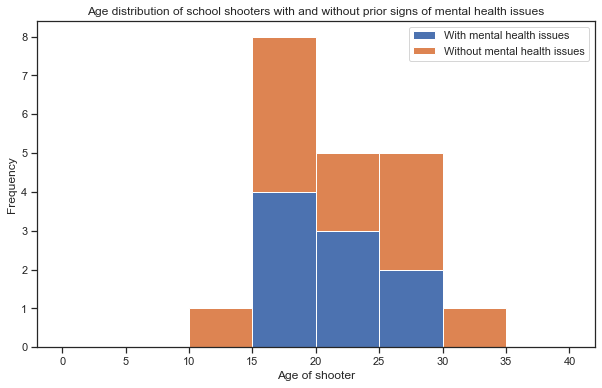

Percentage of school shootings with prior signs of mental health issues: 45.45454545454545
Percentage of school shootings without prior signs of mental health issues: 54.54545454545454


In [39]:
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']

age_of_shooter_with_mental_health_issues = school_shootings[school_shootings['mental_health_issues'] == 1]['age_of_shooter'].dropna().astype(int)
age_of_shooter_without_mental_health_issues = school_shootings[school_shootings['mental_health_issues'] == 0]['age_of_shooter'].dropna().astype(int)

bins = np.arange(0, 45, 5)
plt.figure(figsize=(10, 6))
plt.hist([age_of_shooter_with_mental_health_issues, age_of_shooter_without_mental_health_issues], bins=bins, label=['With mental health issues', 'Without mental health issues'], stacked=True)
plt.xlabel('Age of shooter')
plt.ylabel('Frequency')
plt.title('Age distribution of school shooters with and without prior signs of mental health issues')
plt.legend()
plt.show()

with_mental_health_issues = school_shootings[school_shootings['mental_health_issues'] == 1]
without_mental_health_issues = school_shootings[school_shootings['mental_health_issues'] == 0]

percentage_with_mental_health_issues = (len(with_mental_health_issues) / len(school_shootings)) * 100
percentage_without_mental_health_issues = (len(without_mental_health_issues) / len(school_shootings)) * 100

print("Percentage of school shootings with prior signs of mental health issues:", percentage_with_mental_health_issues)
print("Percentage of school shootings without prior signs of mental health issues:", percentage_without_mental_health_issues)


From the plot above we can conclude that mental health issue is one of the main factor for school schooting incidents. 45% of the shooters have shown prior signs of mental health issues.

The presence of mental health issues among younger individuals is increasing due to the influence of social and environmental factors, such as peer pressure, bullying, and exposure to violence or other traumatic events. Younger individuals may be more vulnerable to these types of negative influences, which could contribute to feelings of isolation, anger, or frustration that could lead to violent behavior. 

# Plot school shootings in the United States 

In [40]:
school_shootings = ShootingDf[ShootingDf['location.1'] == 'School']
locations = school_shootings.dropna(subset=['latitude', 'longitude'])
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for index, row in locations.iterrows():
    popup_html = "<strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}".format("Summary", row["summary"],"Location", row["location"],"Case", row["case"], "Total Victims", row["total_victims"],"Year", row["year"])
    popup = folium.Popup(popup_html, max_width=400)
    folium.Marker([row['latitude'], row['longitude']], popup=popup, icon=folium.Icon(color='red')).add_to(m)
    
m


# Conclusion and Summary

From the analysis above, one can conclude that California is not only the state with the highest number of school shooting incidents, but it also accounts for the highest rate of victims. 


We were also able to conclude that mental health issue is one of the main factor for school schooting incidents. About 45% of the shooters have shown prior signs of mental health issues. 

In this analysis, we only looked at the top 10 states with the highest number of school shooting incidents and the number of victims in those states. To draw a more accurate conclusion, we would need to calculate the rate of victims per capita for all states and compare them.

It is important to note that the dataset used in the analysis only includes school shootings where there were victims, but there may be incidents where there were no injuries or fatalities. To conduct a more comprehensive analysis, it would be important to research further to include all incidents, regardless of whether or not someone suffered physical injury. Additionally, it may be useful to consider other factors such as the motive of the shooter and the type of weapon used to gain a deeper understanding of school shootings.